In [1]:
# TODO Tiffany - education and malnutrition
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [52]:
# Init Data

def init_data(csv):

    if "education" in csv:
        education = pd.read_csv(csv, skiprows = 4)
        return education
        # education.head()
    if "GDP" in csv:
        gdp = pd.read_csv(csv, skiprows = 4)
        return gdp
    if "malnutrition" in csv:
        malnutrition = pd.read_csv(csv, skiprows = 4)
        return malnutrition
    if "poverty" in csv:
        poverty = pd.read_csv(csv, skiprows = 4)
        return poverty
    if "swine" in csv:
        swine_flu = pd.read_csv(csv)
        return swine_flu
    if "covid"  in csv:
        covid = pd.read_csv(csv)
        return covid

def wb_clean(raw):

    # reading in data
    # world_bank_data = os.path.expanduser('../data/world_bank_data/' + raw)
    wb = init_data(os.path.expanduser('../data/world_bank_data/' + raw))
    wb["Country"] = wb["Country Name"]
    wb = wb.drop(["Country Name"], axis = 1).reindex()

    # fixing columns
    cols = list(wb.columns.values)
    cols.pop(cols.index("Country"))
    wb = wb[["Country"] + cols]
    wb["mean"] = wb.mean(axis = 1)

    return wb

In [48]:
# Swine Epidemic
# print(education)
swine_full_path = os.path.expanduser('../data/swine_flu/swine_flu_data.csv')
swine = init_data(swine_full_path)
#sort
swine = swine.sort_values(by = "Country")
# swine.head()
#drop the link column
swine = swine.drop(["Link"], axis = 1)
# swine.head()
#add percent deaths
swine["Percent of Deaths"] = swine["Cumulative no. of deaths"]/swine["Cumulative no. of cases"]
swine = swine.groupby(["Country"]).sum().reset_index()

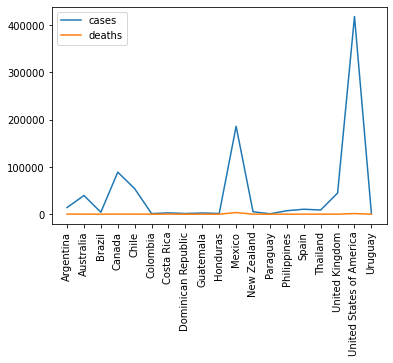

In [29]:
# Swine Epidemic plot cases and deaths
cases = []
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        cases.append(swine["Cumulative no. of cases"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

country = sorted(country)

plt.xticks(rotation = 90)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.legend(["cases", "deaths"])
plt.show()

#plot countries
plt.plot(swine["Country"], swine["Percent of Deaths"])

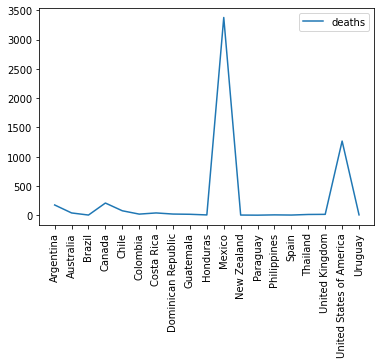

In [30]:
# Swine Epidemic plot deaths
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

plt.xticks(rotation = 90)
plt.plot(country, deaths)
plt.legend(["deaths"])
plt.show()

C:\Users\tiz081\AppData\Local\Temp/ipykernel_14820/2093003511.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis = 1)


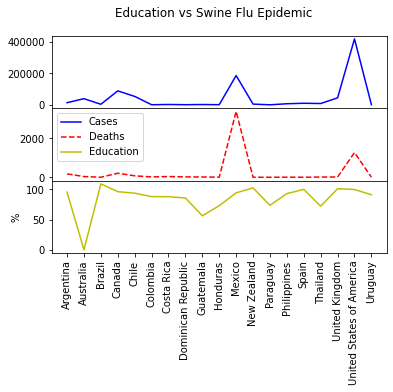

In [49]:
# clean education vs swine
# script_dir = os.path.dirname(__file__)
education_csv = "education.csv"
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"United States":"United States of America"}
education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
swine_edu = education.take(list(keep))
# swine_edu = swine.merge(education, on = "Country", how = 'left')
swine_edu["mean"] = swine_edu["mean"].fillna(0)
swine_edu = swine_edu.sort_values("Country")

#EDUCATION VS SWINE

fig, axs = plt.subplots(3)
fig.suptitle("Education vs Swine Flu Epidemic")
line0, = axs[0].plot(country, cases, color = 'b', linestyle = '-')
line1, = axs[1].plot(country, deaths, color = 'r', linestyle = '--')
line2, = axs[2].plot(country, list(swine_edu["mean"]), color = 'y')
plt.xticks(rotation = 90)
plt.setp(axs[0].get_xticklabels(), visible = False)
plt.setp(axs[1].get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = .0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Education"), loc = "upper left")
plt.show()

C:\Users\tiz081\AppData\Local\Temp/ipykernel_14820/2093003511.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis = 1)


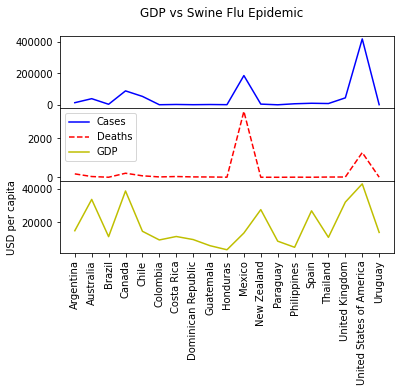

In [40]:
# GDP vs SWINE CLEAN

# script_dir = os.path.dirname(__file__)
gdp_csv = "GDP.csv"
gdp = wb_clean(os.path.expanduser(gdp_csv))

drop = []
us = {"United States":"United States of America"}
gdp['Country'] = gdp['Country'].replace(us)
for idx, coun in enumerate(gdp["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(gdp.shape[0])) - set(drop)
swine_gdp = gdp.take(list(keep))
# swine_edu = swine.merge(education, on = "Country", how = 'left')
swine_gdp["mean"] = swine_gdp["mean"].fillna(0)
swine_gdp = swine_gdp.sort_values("Country")

#GDP VS SWINE plot

fig, axs = plt.subplots(3)
fig.suptitle("GDP vs Swine Flu Epidemic")
line0, = axs[0].plot(country, cases, color = 'b', linestyle = '-')
line1, = axs[1].plot(country, deaths, color = 'r', linestyle = '--')
line2, = axs[2].plot(country, list(swine_gdp["mean"]), color = 'y')
plt.xticks(rotation = 90)
plt.setp(axs[0].get_xticklabels(), visible = False)
plt.setp(axs[1].get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = .0)
axs[2].set_ylabel("USD per capita")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "GDP"), loc = "upper left")
plt.show()

C:\Users\tiz081\AppData\Local\Temp/ipykernel_14820/2093003511.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis = 1)


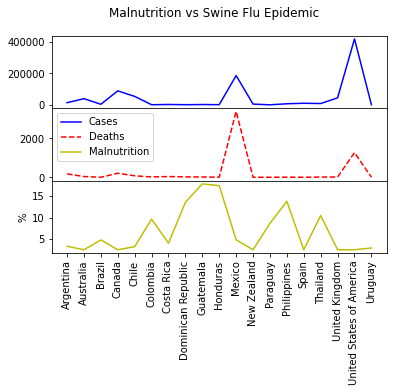

In [41]:
# malnutrition vs SWINE CLEAN

# script_dir = os.path.dirname(__file__)
mal_csv = "malnutrition.csv"
mal = wb_clean(os.path.expanduser(mal_csv))

drop = []
us = {"United States":"United States of America"}
mal['Country'] = mal['Country'].replace(us)
for idx, coun in enumerate(mal["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(mal.shape[0])) - set(drop)
swine_mal = mal.take(list(keep))
# swine_edu = swine.merge(education, on = "Country", how = 'left')
swine_mal["mean"] = swine_mal["mean"].fillna(0)
swine_mal = swine_mal.sort_values("Country")

#MALNUTRITION VS SWINE plot

fig, axs = plt.subplots(3)
fig.suptitle("Malnutrition vs Swine Flu Epidemic")
line0, = axs[0].plot(country, cases, color = 'b', linestyle = '-')
line1, = axs[1].plot(country, deaths, color = 'r', linestyle = '--')
line2, = axs[2].plot(country, list(swine_mal["mean"]), color = 'y')
plt.xticks(rotation = 90)
plt.setp(axs[0].get_xticklabels(), visible = False)
plt.setp(axs[1].get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = .0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Malnutrition"), loc = "upper left")
plt.show()

C:\Users\tiz081\AppData\Local\Temp/ipykernel_14820/2093003511.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis = 1)


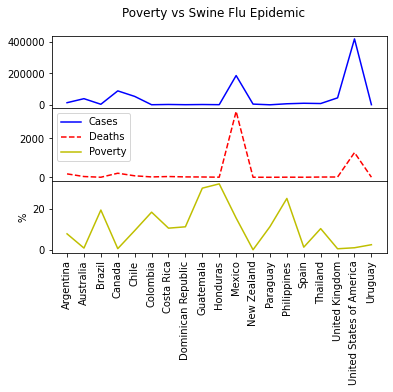

In [47]:
# poverty vs SWINE CLEAN

# script_dir = os.path.dirname(__file__)
pov_csv = "poverty.csv"
pov = wb_clean(os.path.expanduser(pov_csv))

drop = []
us = {"United States":"United States of America"}
pov['Country'] = pov['Country'].replace(us)
for idx, coun in enumerate(pov["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(pov.shape[0])) - set(drop)
swine_pov = pov.take(list(keep))
# swine_edu = swine.merge(education, on = "Country", how = 'left')
swine_pov["mean"] = swine_pov["mean"].fillna(0)
swine_pov = swine_pov.sort_values("Country")

#POVERTY VS SWINE plot

fig, axs = plt.subplots(3)
fig.suptitle("Poverty vs Swine Flu Epidemic")
line0, = axs[0].plot(country, cases, color = 'b', linestyle = '-')
line1, = axs[1].plot(country, deaths, color = 'r', linestyle = '--')
line2, = axs[2].plot(country, list(swine_pov["mean"]), color = 'y')
plt.xticks(rotation = 90)
plt.setp(axs[0].get_xticklabels(), visible = False)
plt.setp(axs[1].get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = .0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Poverty"), loc = "upper left")
plt.show()

In [73]:
# Covid Pandemic
# print(education)
covid_full_path = os.path.expanduser('../data/covid/full_grouped.csv')
covid = init_data(covid_full_path)
#sort
# covid = covid.sort_values(by = "Country")
# covid.head()
covid["Country"] = covid["Country/Region"]
covid["Total Cases"] = covid["Confirmed"] + covid["New cases"]
covid["Total Deaths"] = covid["Deaths"] + covid["New deaths"]
covid["Percent of Deaths"] = covid["Total Deaths"]/covid["Total Cases"]
#drop the link column
covid = covid.drop(["Country/Region"], axis = 1)
covid = covid.drop(["Confirmed"], axis = 1)
covid = covid.drop(["New cases"], axis = 1)
covid = covid.drop(["Deaths"], axis = 1)
covid = covid.drop(["New deaths"], axis = 1)
covid = covid.groupby(["Country"]).sum().reset_index()
covid.head()

,Country,Recovered,Active,New recovered,Total Cases,Total Deaths,Percent of Deaths
0,Afghanistan,798240,1089052,25198,1972653,50367,3.378099
1,Albania,118877,72117,2745,201582,5852,4.801469
2,Algeria,755897,345886,18837,1207728,79135,11.523012
3,Andorra,69074,19907,803,95311,5475,7.025168
4,Angola,6573,15011,242,23612,1119,8.513762


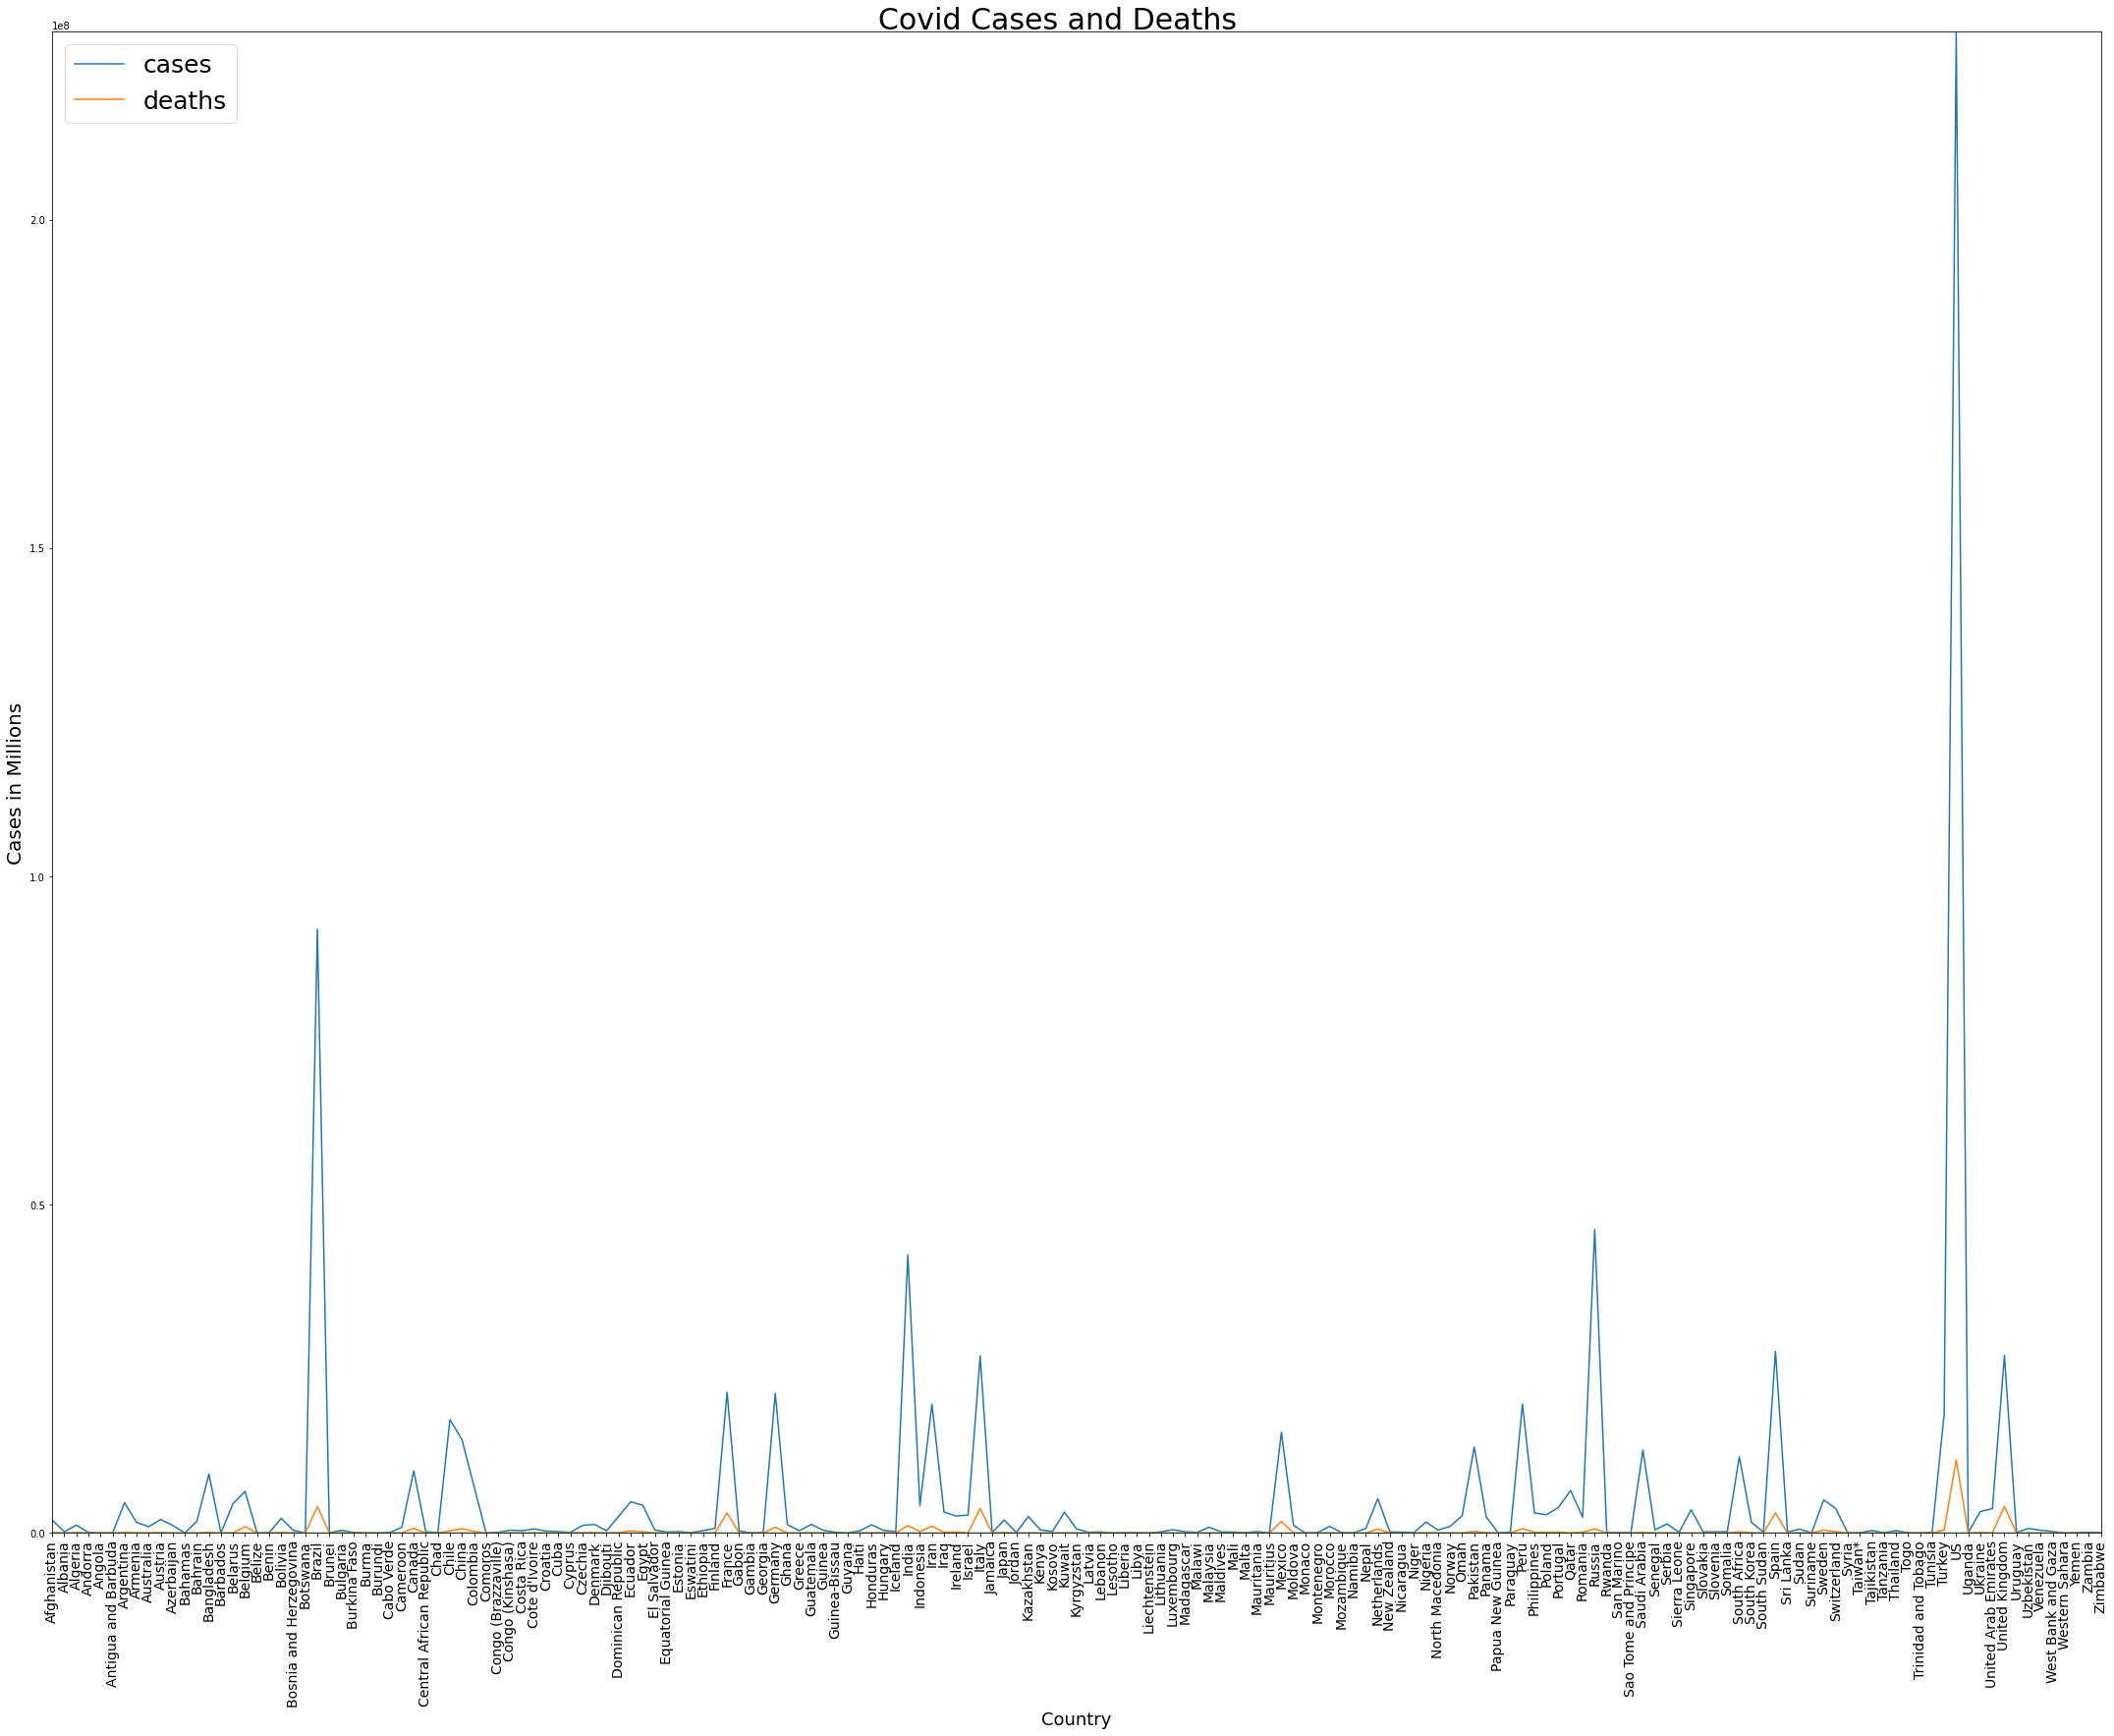

In [75]:
# Covid Pandemic plot cases and deaths
cases = []
deaths = []
country = []
percent = []

for i in range(0, len(covid["Country"])):
    if covid["Total Deaths"][i] > 0:
        # print('nope')
        country.append(covid["Country"][i])
        cases.append(covid["Total Cases"][i])
        deaths.append(covid["Total Deaths"][i])
        percent.append(covid["Percent of Deaths"][i])

country = sorted(country)

fig, ax = plt.subplots(1, 1, figsize = [30, 25])
fig.suptitle("Covid Cases and Deaths", fontsize = 30)
plt.xlabel("Country", fontsize = 18)
plt.ylabel("Cases in Millions", fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.margins(x = 0, y = 0)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.plot(country, percent)
plt.legend(["cases", "deaths"], fontsize = 25)
plt.show()

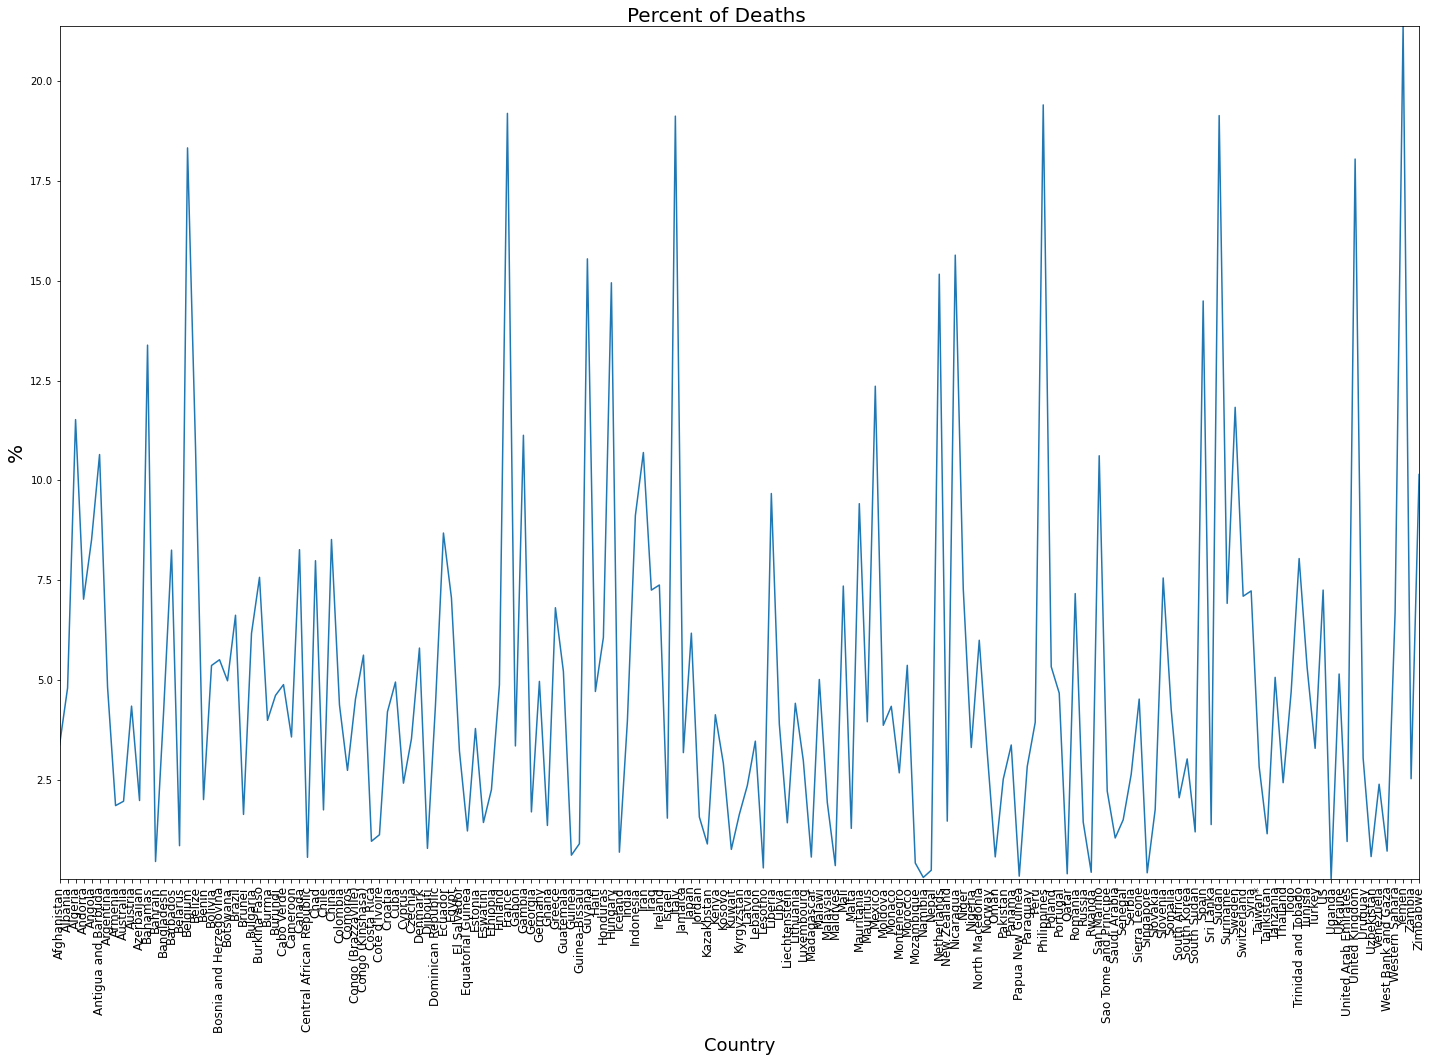

In [77]:
fig, ax = plt.subplots(1, 1, figsize = [20, 15])
fig.suptitle("Percent of Deaths", fontsize = 20)
plt.xlabel("Country", fontsize = 18)
plt.ylabel("%", fontsize = 20)
plt.xticks(rotation = 90, fontsize = 12)
plt.margins(x = 0, y = 0)
plt.plot(country, percent)

C:\Users\tiz081\AppData\Local\Temp/ipykernel_14820/1616535042.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis = 1)


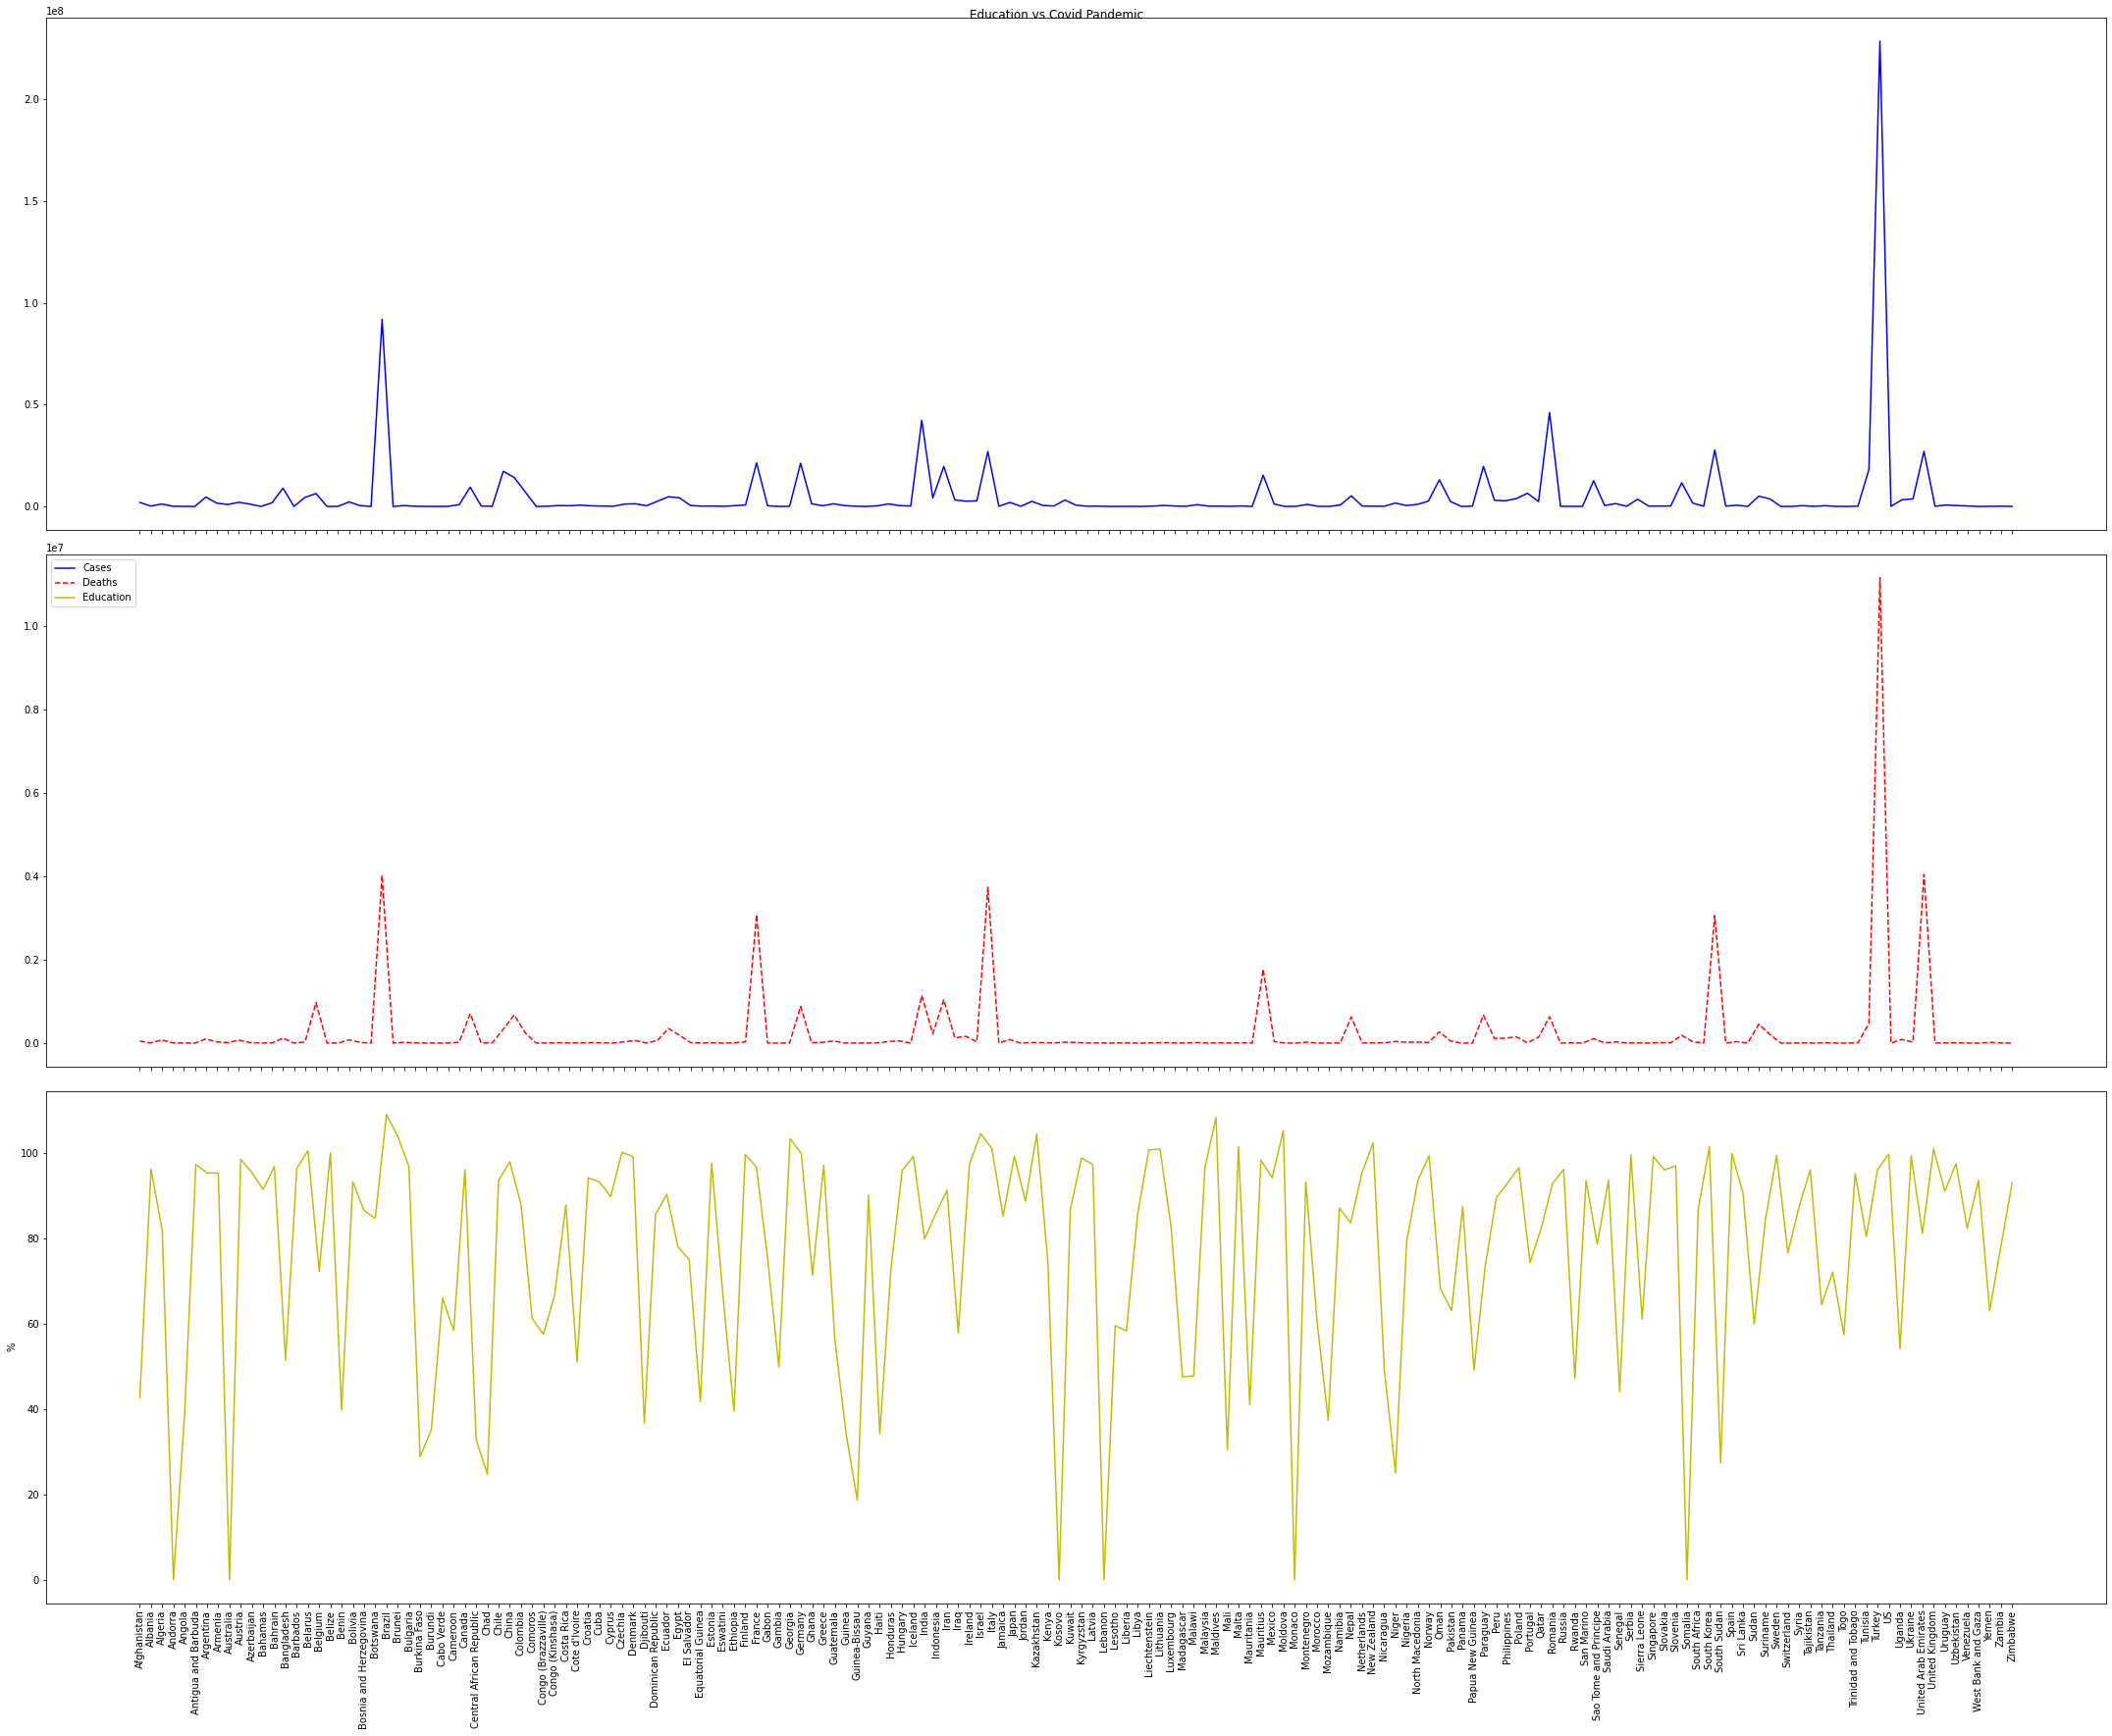

In [124]:
# Education vs Covid Pandemic
education_csv = "education.csv"
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"Brunei Darussalam":"Brunei", "Congo, Dem. Rep.":"Congo (Brazzaville)", "Bahamas, The":"Bahamas",
                "Congo, Rep.":"Congo (Kinshasa)", "Czech Republic":"Czechia", "Egypt, Arab Rep.":"Egypt",
                "Gambia, The":"Gambia", "Iran, Islamic Rep.":"Iran", "Kyrgyz Republic":"Kyrgyzstan", 
                "Korea, Rep.":"South Korea", "Lao PDR":"Laos", "St. Lucia":"Saint Lucia", "Russian Federation":"Russia",
                "Slovak Republic":"Slovakia", "Syrian Arab Republic":"Syria", "St. Vincent and the Grenadines":"Saint Vincent and the Grenadines",
                "Venezuela, RB":"Venezuela", "United States":"US", "Yemen, Rep.":"Yemen"}

education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
covid_edu = education.take(list(keep))  

covid_edu["mean"] = covid_edu["mean"].fillna(0)
covid_edu = covid_edu.sort_values("Country")
# print(list(covid_edu["Country"]))

#EDUCATION VS COVID
fig, axs = plt.subplots(3, figsize = [30, 25])
fig.suptitle("Education vs Covid Pandemic")
line0, = axs[0].plot(country, cases, color = 'b', linestyle = '-')
line1, = axs[1].plot(country, deaths, color = 'r', linestyle = '--')
line2, = axs[2].plot(list(covid_edu["Country"]), list(covid_edu["mean"]), color = 'y')
plt.xticks(rotation = 90)
plt.setp(axs[0].get_xticklabels(), visible = False)
plt.setp(axs[1].get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = .0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Education"), loc = "upper left")
plt.show()

C:\Users\tiz081\AppData\Local\Temp/ipykernel_14820/1616535042.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis = 1)


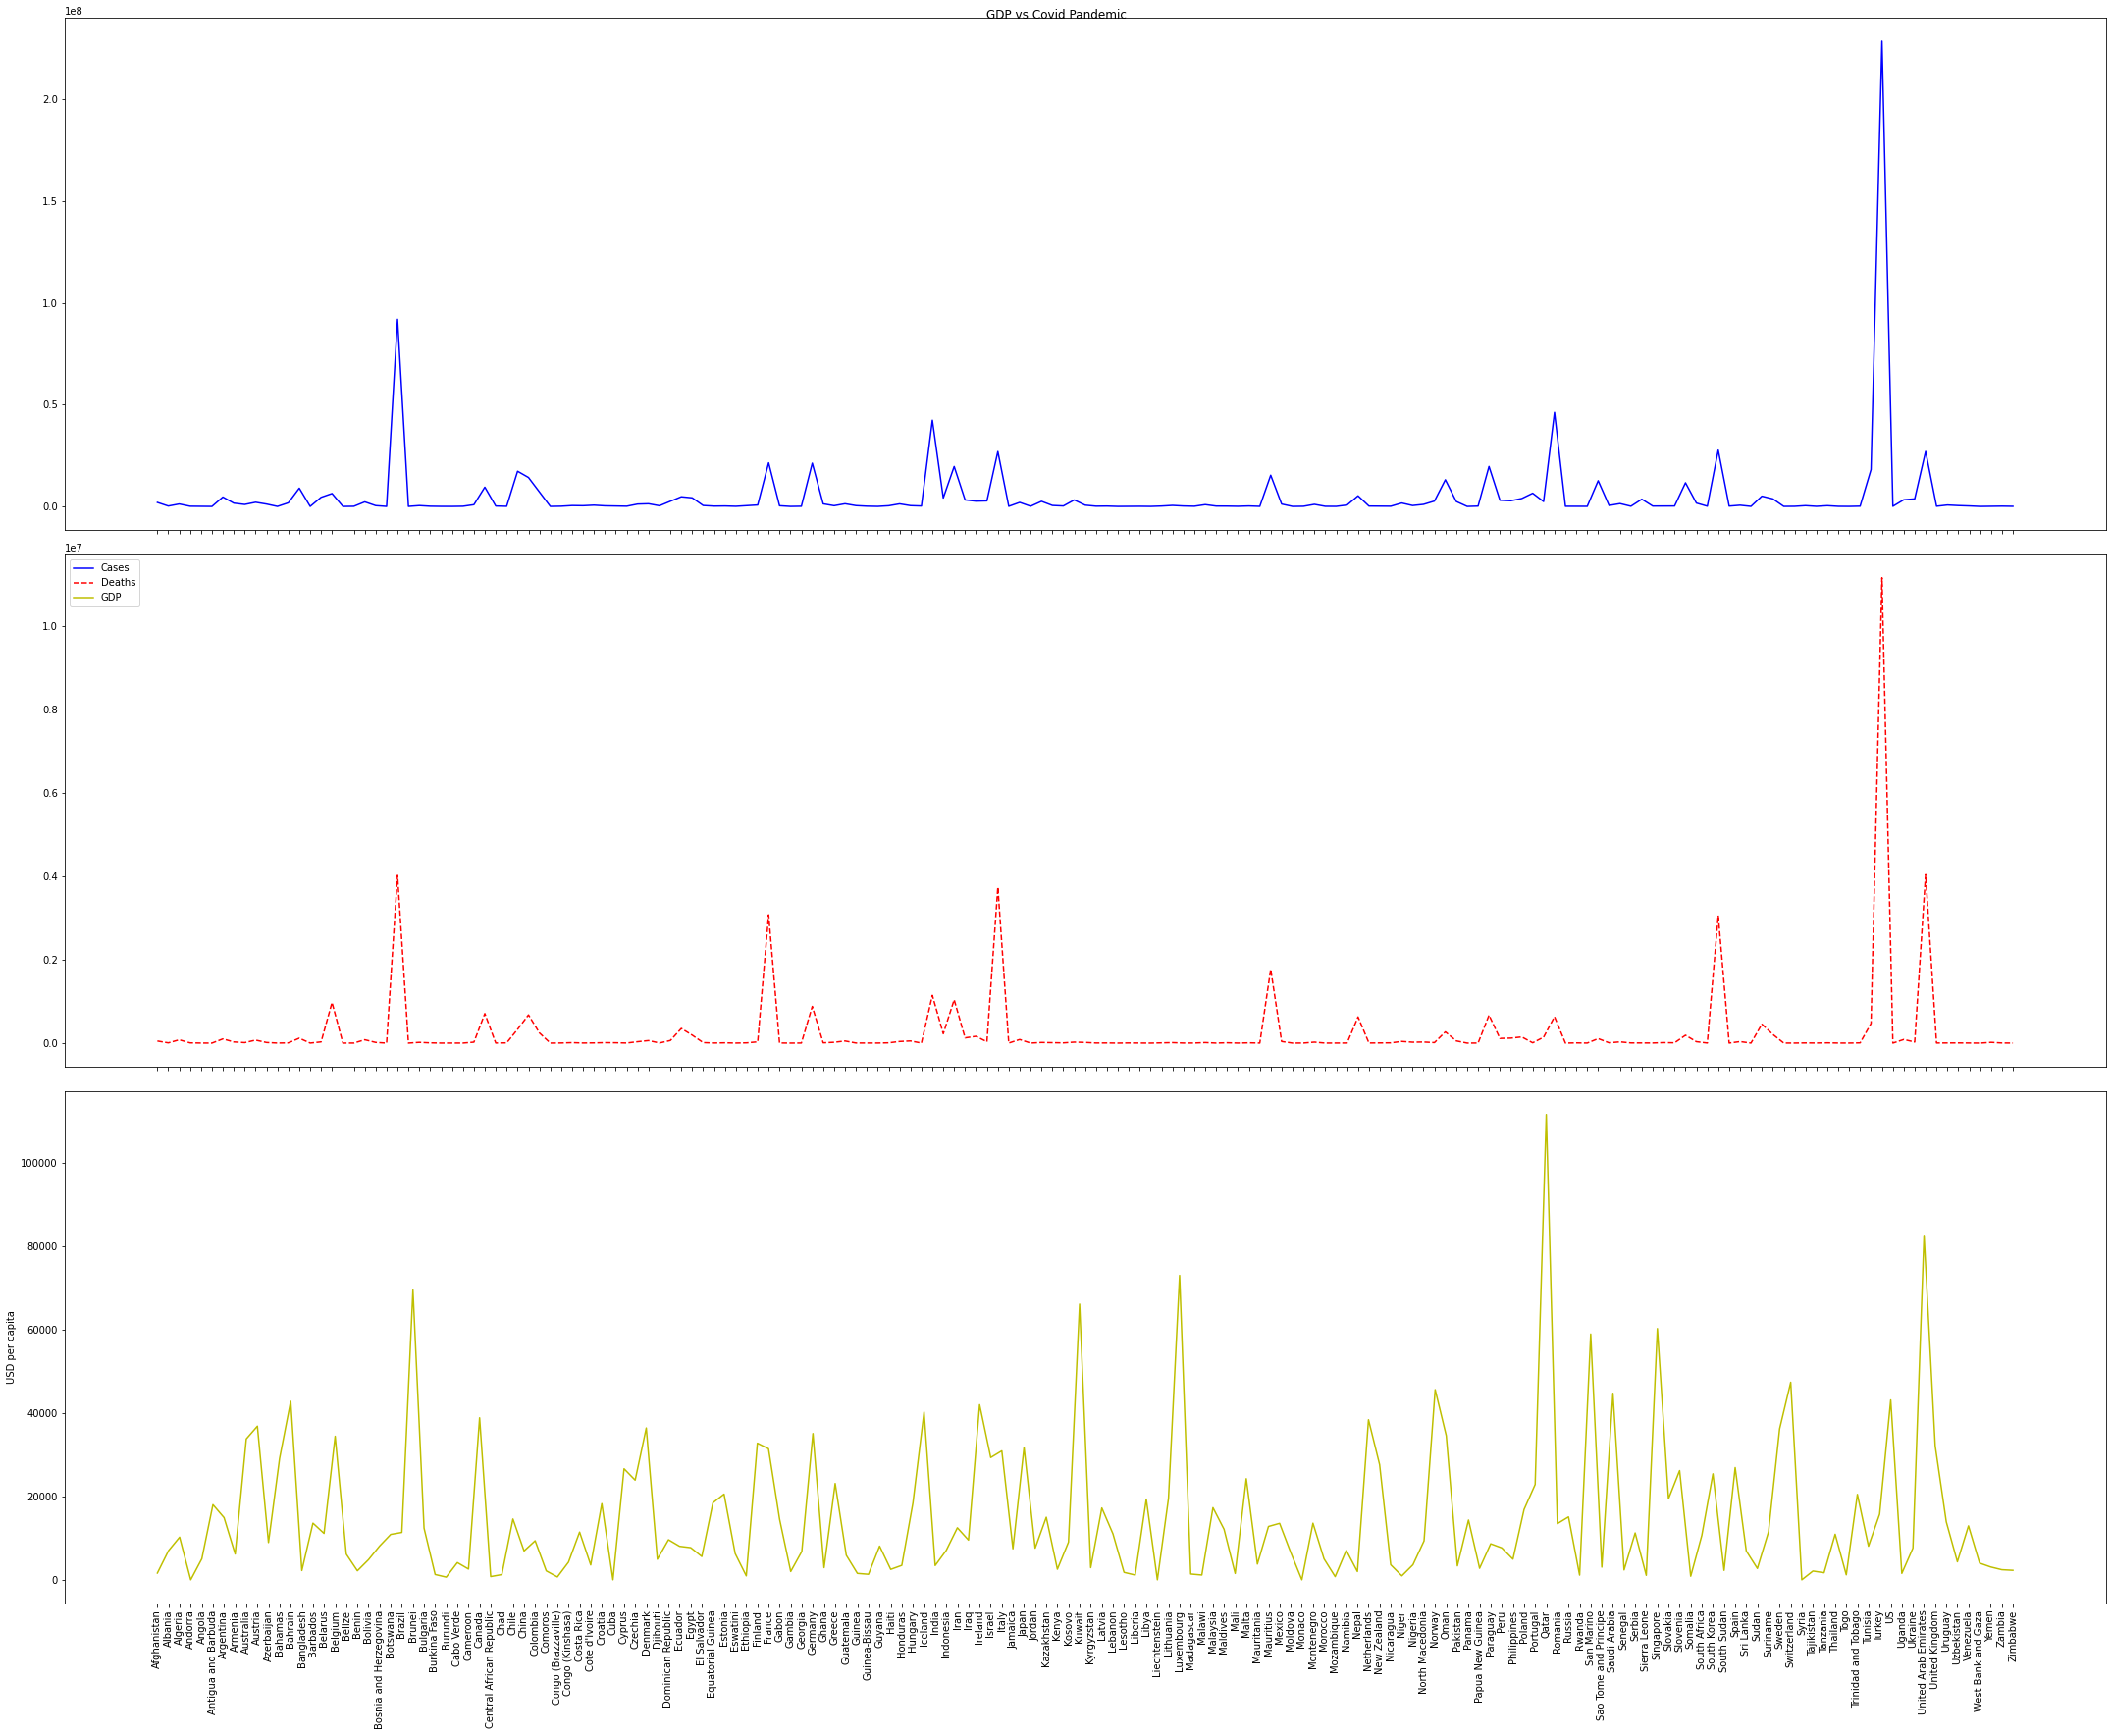

In [129]:
# GDP vs Covid Pandemic
education_csv = "GDP.csv"
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"Brunei Darussalam":"Brunei", "Congo, Dem. Rep.":"Congo (Brazzaville)", "Bahamas, The":"Bahamas",
                "Congo, Rep.":"Congo (Kinshasa)", "Czech Republic":"Czechia", "Egypt, Arab Rep.":"Egypt",
                "Gambia, The":"Gambia", "Iran, Islamic Rep.":"Iran", "Kyrgyz Republic":"Kyrgyzstan", 
                "Korea, Rep.":"South Korea", "Lao PDR":"Laos", "St. Lucia":"Saint Lucia", "Russian Federation":"Russia",
                "Slovak Republic":"Slovakia", "Syrian Arab Republic":"Syria", "St. Vincent and the Grenadines":"Saint Vincent and the Grenadines",
                "Venezuela, RB":"Venezuela", "United States":"US", "Yemen, Rep.":"Yemen"}

education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
covid_edu = education.take(list(keep))  

covid_edu["mean"] = covid_edu["mean"].fillna(0)
covid_edu = covid_edu.sort_values("Country")
# print(list(covid_edu["Country"]))

#EDUCATION VS COVID
fig, axs = plt.subplots(3, figsize = [30, 25])
fig.suptitle("GDP vs Covid Pandemic")
line0, = axs[0].plot(country, cases, color = 'b', linestyle = '-')
line1, = axs[1].plot(country, deaths, color = 'r', linestyle = '--')
line2, = axs[2].plot(list(covid_edu["Country"]), list(covid_edu["mean"]), color = 'y')
plt.xticks(rotation = 90)
plt.setp(axs[0].get_xticklabels(), visible = False)
plt.setp(axs[1].get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = .0)
axs[2].set_ylabel("USD per capita")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "GDP"), loc = "upper left")
plt.show()

C:\Users\tiz081\AppData\Local\Temp/ipykernel_14820/1616535042.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis = 1)


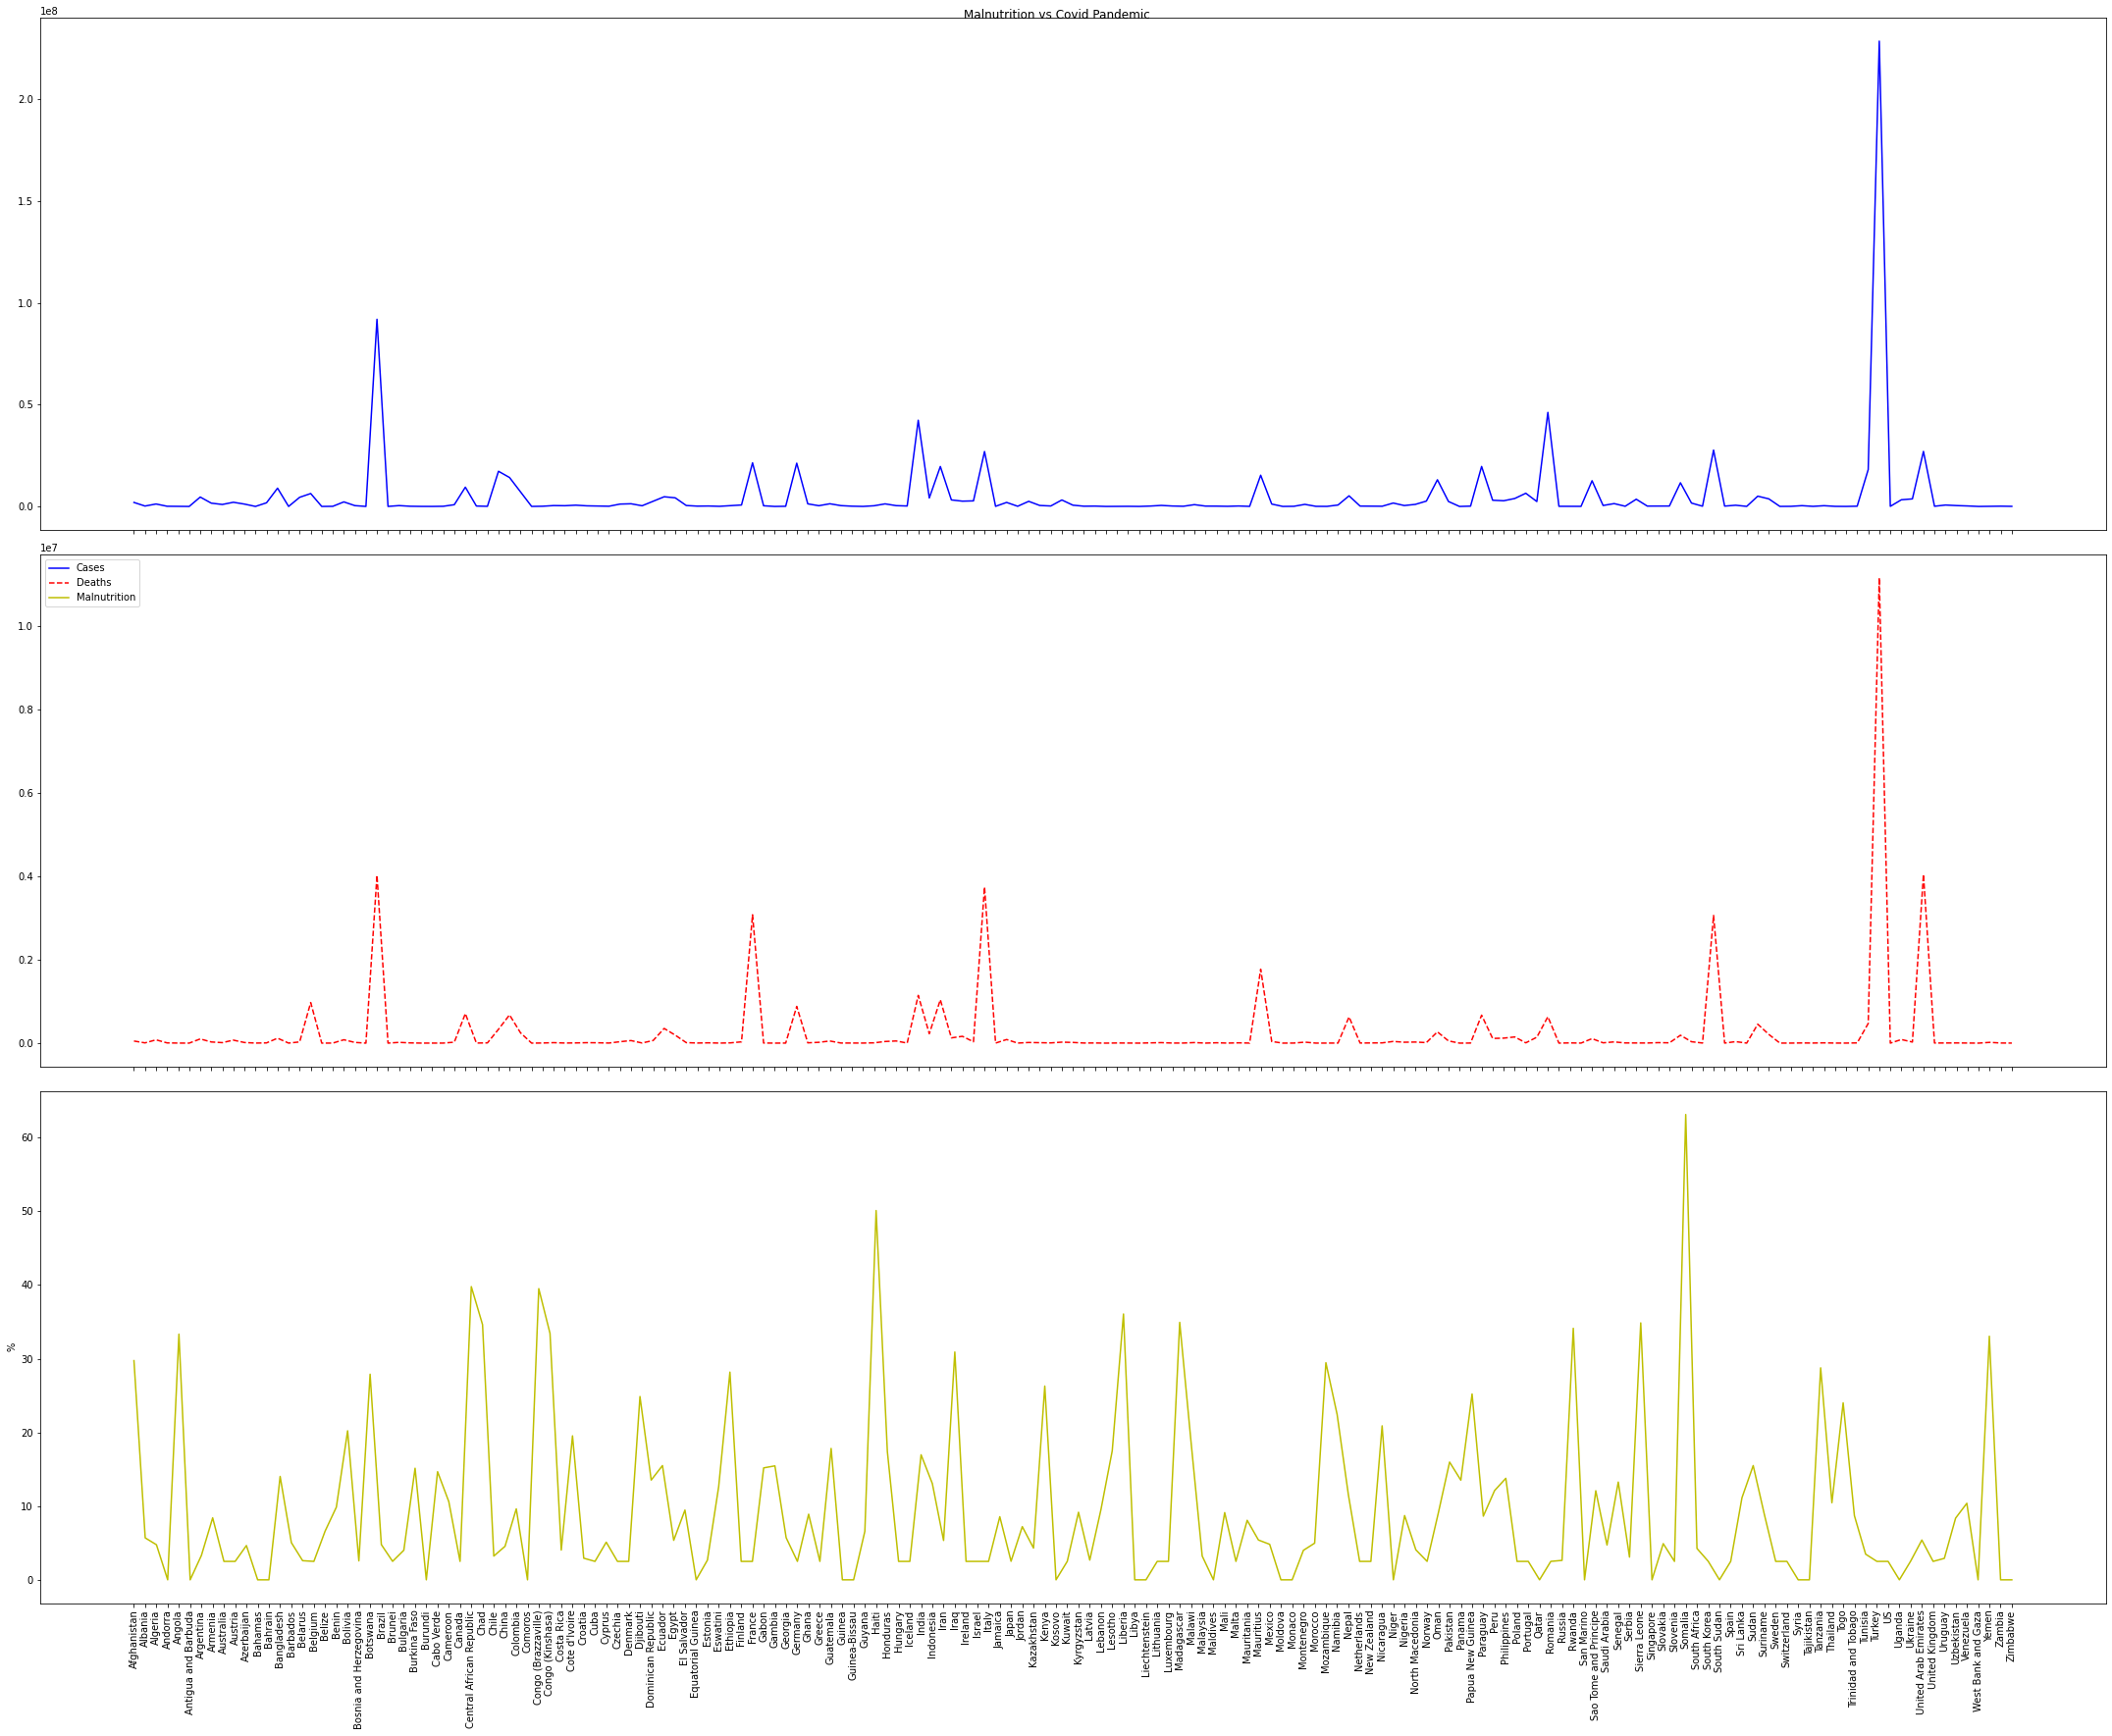

In [130]:
# malnutrition vs Covid Pandemic
education_csv = "malnutrition.csv"
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"Brunei Darussalam":"Brunei", "Congo, Dem. Rep.":"Congo (Brazzaville)", "Bahamas, The":"Bahamas",
                "Congo, Rep.":"Congo (Kinshasa)", "Czech Republic":"Czechia", "Egypt, Arab Rep.":"Egypt",
                "Gambia, The":"Gambia", "Iran, Islamic Rep.":"Iran", "Kyrgyz Republic":"Kyrgyzstan", 
                "Korea, Rep.":"South Korea", "Lao PDR":"Laos", "St. Lucia":"Saint Lucia", "Russian Federation":"Russia",
                "Slovak Republic":"Slovakia", "Syrian Arab Republic":"Syria", "St. Vincent and the Grenadines":"Saint Vincent and the Grenadines",
                "Venezuela, RB":"Venezuela", "United States":"US", "Yemen, Rep.":"Yemen"}

education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
covid_edu = education.take(list(keep))  

covid_edu["mean"] = covid_edu["mean"].fillna(0)
covid_edu = covid_edu.sort_values("Country")
# print(list(covid_edu["Country"]))

#EDUCATION VS COVID
fig, axs = plt.subplots(3, figsize = [30, 25])
fig.suptitle("Malnutrition vs Covid Pandemic")
line0, = axs[0].plot(country, cases, color = 'b', linestyle = '-')
line1, = axs[1].plot(country, deaths, color = 'r', linestyle = '--')
line2, = axs[2].plot(list(covid_edu["Country"]), list(covid_edu["mean"]), color = 'y')
plt.xticks(rotation = 90)
plt.setp(axs[0].get_xticklabels(), visible = False)
plt.setp(axs[1].get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = .0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Malnutrition"), loc = "upper left")
plt.show()

C:\Users\tiz081\AppData\Local\Temp/ipykernel_14820/1616535042.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis = 1)


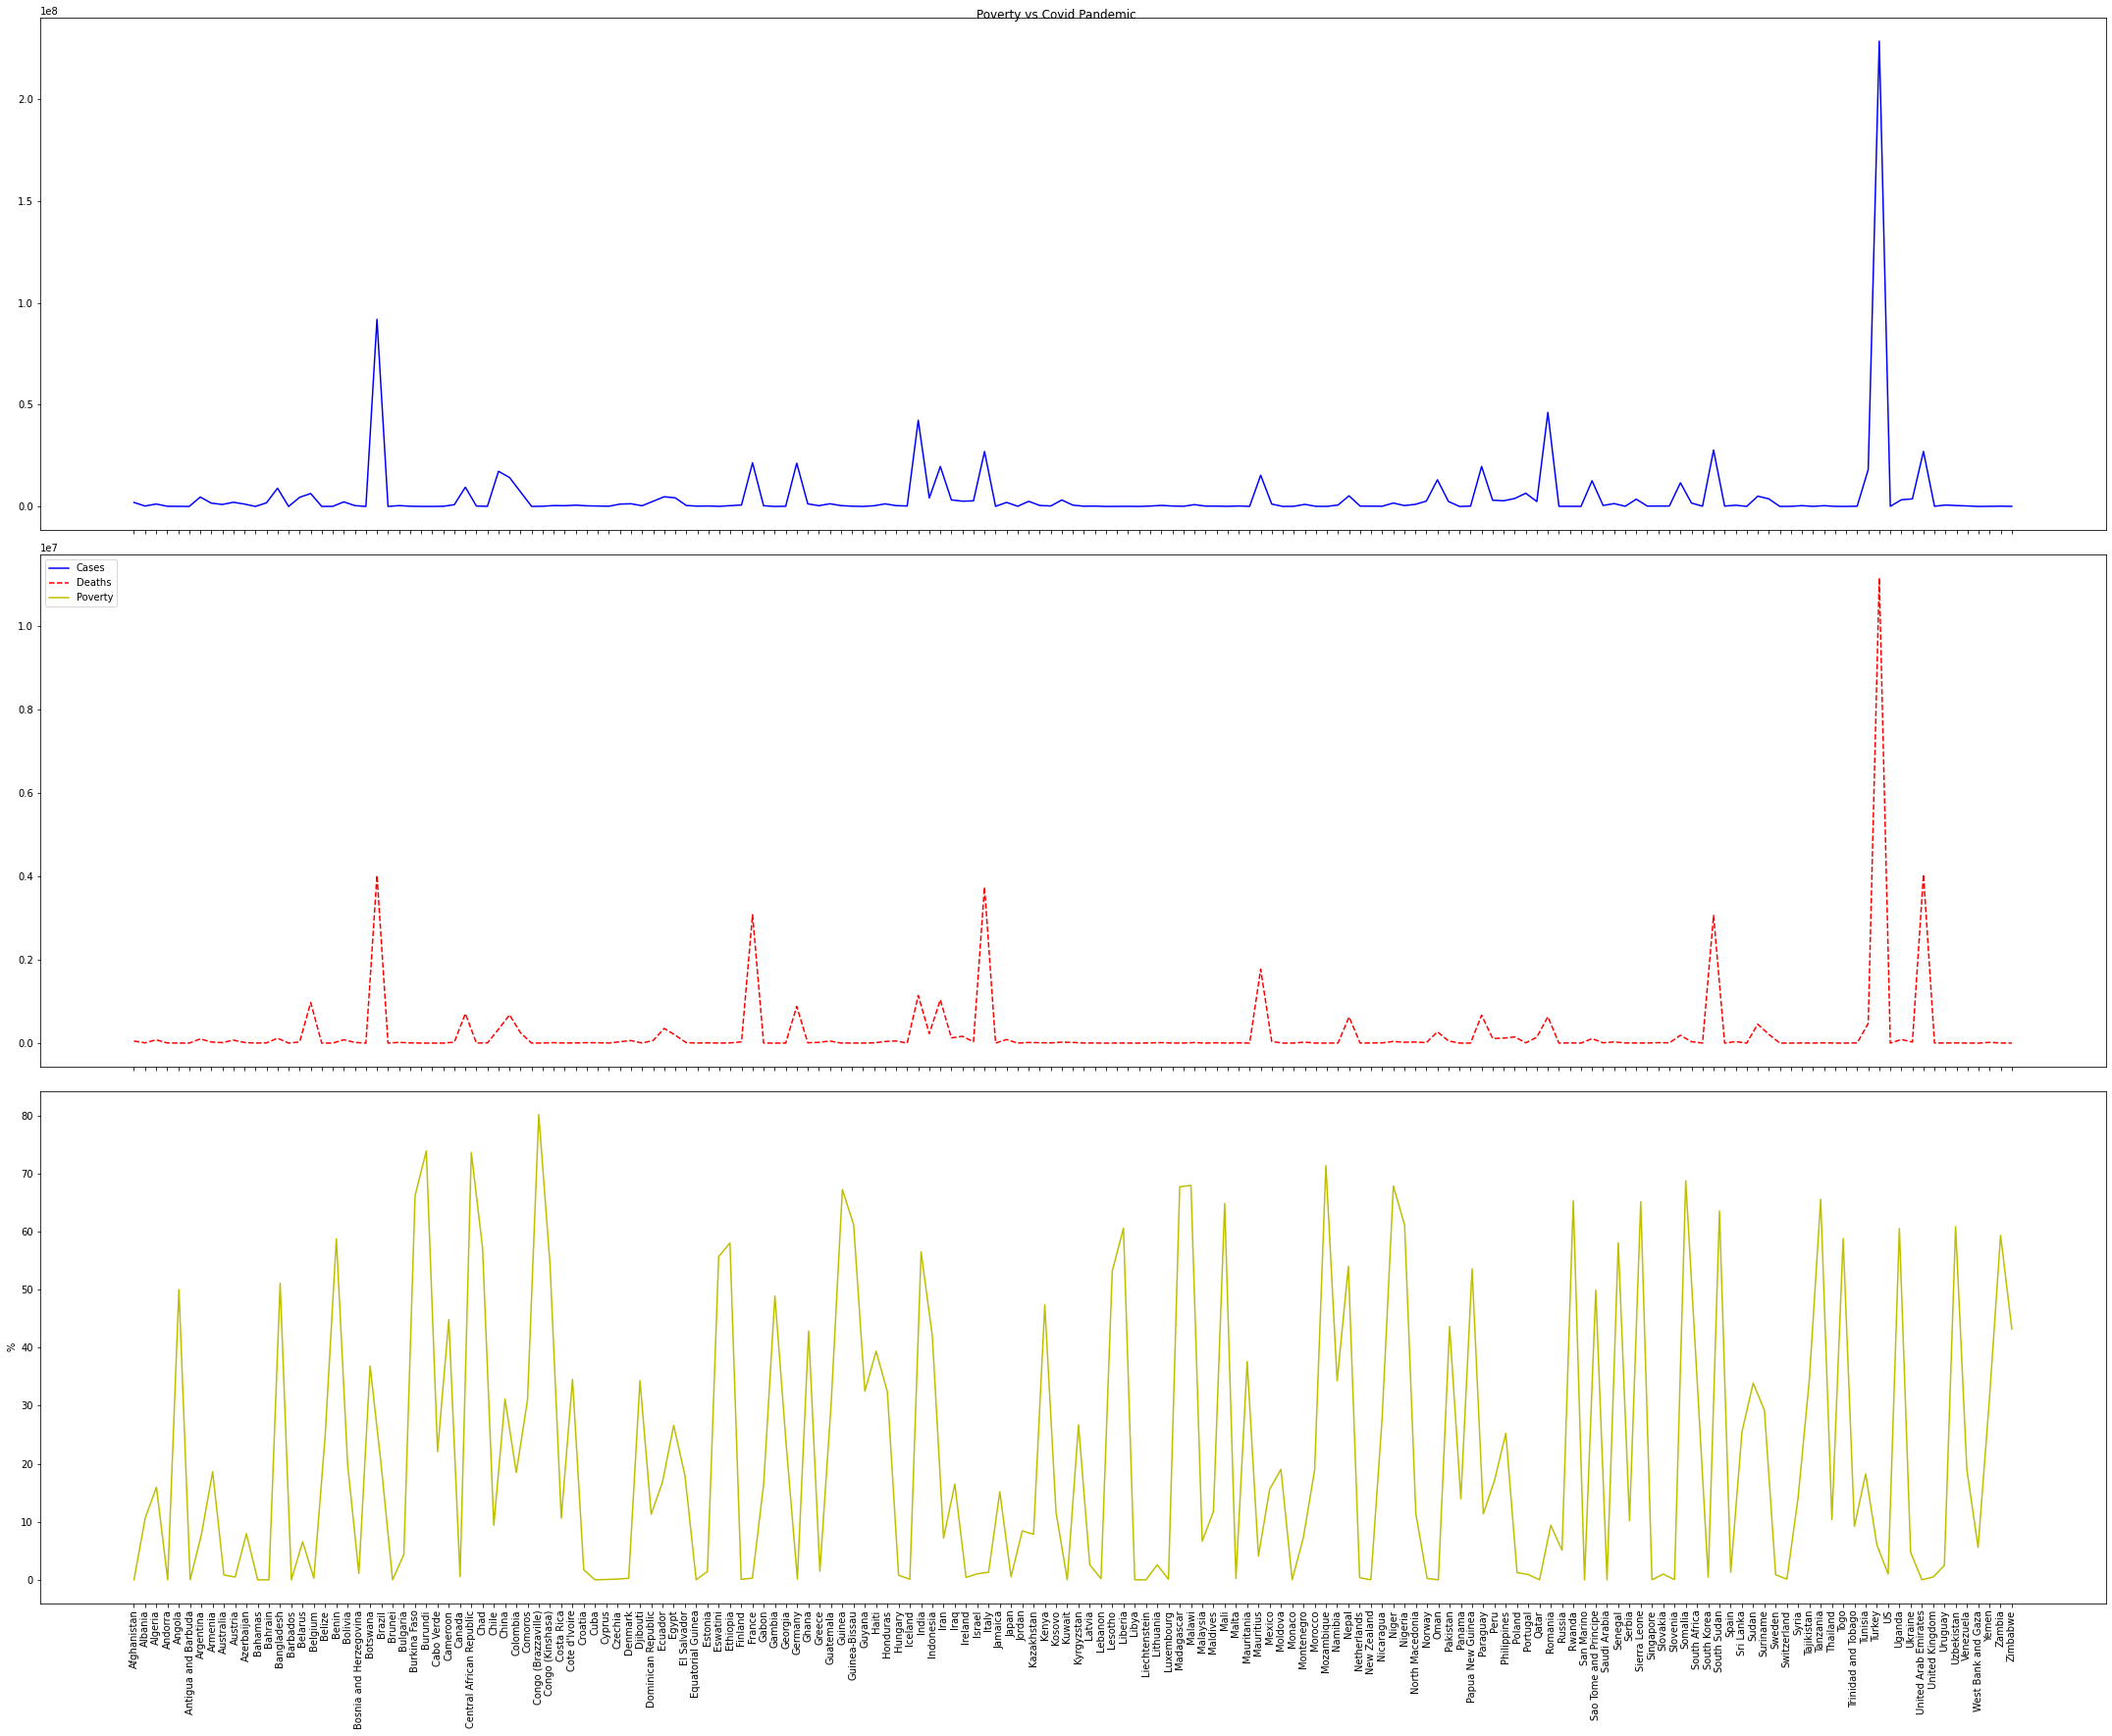

In [131]:
# poverty vs Covid Pandemic
education_csv = "poverty.csv"
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"Brunei Darussalam":"Brunei", "Congo, Dem. Rep.":"Congo (Brazzaville)", "Bahamas, The":"Bahamas",
                "Congo, Rep.":"Congo (Kinshasa)", "Czech Republic":"Czechia", "Egypt, Arab Rep.":"Egypt",
                "Gambia, The":"Gambia", "Iran, Islamic Rep.":"Iran", "Kyrgyz Republic":"Kyrgyzstan", 
                "Korea, Rep.":"South Korea", "Lao PDR":"Laos", "St. Lucia":"Saint Lucia", "Russian Federation":"Russia",
                "Slovak Republic":"Slovakia", "Syrian Arab Republic":"Syria", "St. Vincent and the Grenadines":"Saint Vincent and the Grenadines",
                "Venezuela, RB":"Venezuela", "United States":"US", "Yemen, Rep.":"Yemen"}

education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
covid_edu = education.take(list(keep))  

covid_edu["mean"] = covid_edu["mean"].fillna(0)
covid_edu = covid_edu.sort_values("Country")
# print(list(covid_edu["Country"]))

#EDUCATION VS COVID
fig, axs = plt.subplots(3, figsize = [30, 25])
fig.suptitle("Poverty vs Covid Pandemic")
line0, = axs[0].plot(country, cases, color = 'b', linestyle = '-')
line1, = axs[1].plot(country, deaths, color = 'r', linestyle = '--')
line2, = axs[2].plot(list(covid_edu["Country"]), list(covid_edu["mean"]), color = 'y')
plt.xticks(rotation = 90)
plt.setp(axs[0].get_xticklabels(), visible = False)
plt.setp(axs[1].get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = .0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Poverty"), loc = "upper left")
plt.show()